# Smartphone Price Prediction Model Building and Evaluation

## Introduction
This Jupyter Notebook details the process of building and evaluating a machine learning model for smartphone price prediction using XGBoost classifier.

## 1. Data Loading and Preprocessing

### Importing Packages
We begin by importing necessary packages for data manipulation, model building, and evaluation.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import pickle
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
# Import packages for data visualization
import matplotlib.pyplot as plt
import numpy as np

### Loading and Preprocessing Data
We load the preprocessed train data and split it into train, validation, and test sets.

In [2]:
#Data Loading and Preprocessing
processed_data = pd.read_csv('processed_train_data.csv')
X = processed_data.drop('price_range', axis=1)
y = processed_data['price_range']

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [3]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,combined_g,screen_size,pixel_density
809,1320,False,0.5,True,7.0,48.0,0.2,168.0,5.0,16.0,2893.0,9,False,True,2,9.4,17345.6
1458,1497,True,0.9,True,4.0,10.0,0.1,153.0,8.0,20.0,3696.0,3,False,True,4,9.0,10638.4
1911,591,True,0.5,True,1.0,16.0,0.9,90.0,6.0,17.0,3746.0,5,True,False,4,5.0,285975.2
1950,1884,False,1.0,True,3.0,24.0,0.5,149.0,6.0,4.0,1396.0,9,True,True,3,17.0,81004.2
1090,1697,False,0.5,False,0.0,60.0,0.1,90.0,4.0,0.0,441.0,11,True,False,4,15.0,6136.5


## 2. Model Training and Hyperparameter Tuning
### XGBoost Classifier Initialization
We initialize an XGBoost classifier and set up a parameter grid for hyperparameter tuning.

In [ ]:
xgb = XGBClassifier()

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_delta_step' : [1, 2, 3],
    'min_child_weight' : [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'importance_type': ['gain', 'weight', 'cover', 'total_gain', 'total_cover']
}

### Grid Search for Hyperparameter Tuning
We perform grid search cross-validation to find the best hyperparameters.

In [3]:
%%time
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 19440 candidates, totalling 97200 fits
Best Parameters: {'gamma': 0.2, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'reg_lambda': 0.1}
CPU times: user 2min 4s, sys: 9.99 s, total: 2min 14s
Wall time: 31min 15s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=3, max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### Model Training with Best Parameters
We train the XGBoost classifier with the best parameters obtained from grid search.

In [ ]:
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

## 3. Model Evaluation
### Evaluation on Validation Set
We evaluate the trained model on the validation set to assess its performance.

In [4]:
#Model Evaluation on Validation Set
y_pred_valid = best_xgb.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Accuracy on Validation Set:", accuracy_valid)

Accuracy on Validation Set: 0.914572864321608


### Evaluation on Test Set

In [5]:
#Model Evaluation on Test Set
y_pred_test = best_xgb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)

Accuracy on Test Set: 0.905


## 4. Model Visualization and Analysis
### Confusion Matrix
We visualize the confusion matrix to understand the model's performance in predicting each class.

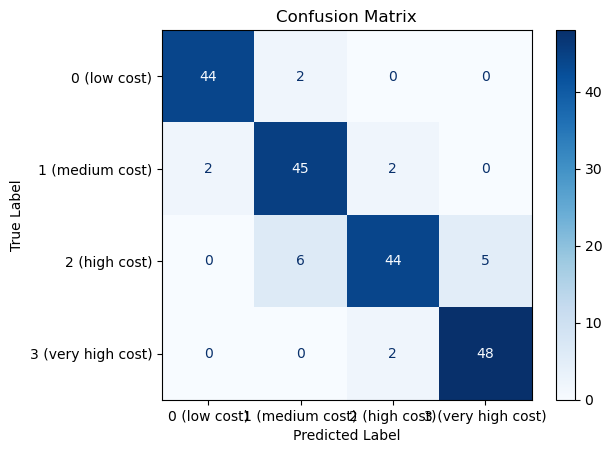

In [26]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0 (low cost)', '1 (medium cost)', '2 (high cost)', '3 (very high cost)'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Classification Report
We provide a detailed classification report including precision, recall, and F1-score.

In [9]:
# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.85      0.92      0.88        49
           2       0.92      0.80      0.85        55
           3       0.91      0.96      0.93        50

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.90       200



## 5. Model Persistence
### Saving the Model
We save the trained model using pickle for future use.

In [6]:
#Saving the Model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)